In [19]:
import os
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
import numpy as np
import pprint
import matplotlib.pyplot as plt
from ResoFit.experiment import Experiment
import peakutils as pku
from ResoFit.simulation import Simulation

%pylab


Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
energy_min = 7
energy_max = 150
energy_step = 0.01
simulation = Simulation(energy_min=energy_min,
                        energy_max=energy_max,
                        energy_step=energy_step)
simulation.add_layer(layer='U', layer_thickness_mm=0.05)

In [3]:
x = simulation.o_reso.stack_sigma['U']['U']['energy_eV']

In [4]:
y = simulation.o_reso.stack_sigma['U']['U']['sigma_b']

In [5]:
plt.plot(x,y)

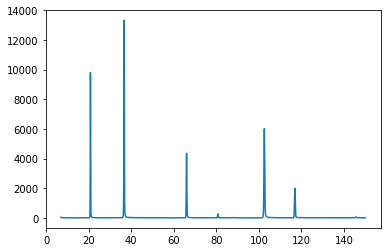

In [6]:
plt.show()

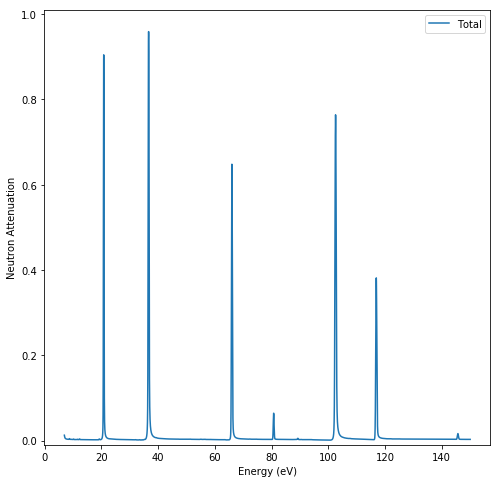

In [7]:
simulation.o_reso.plot()

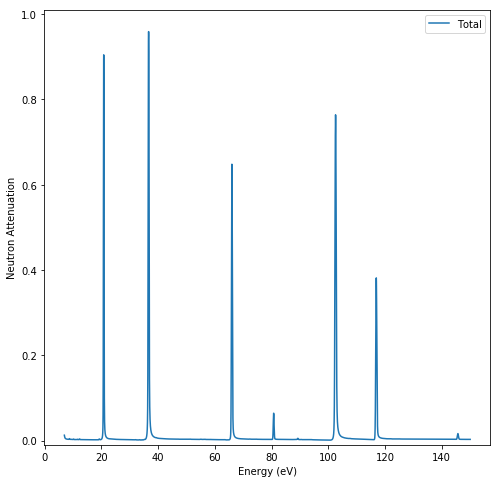

In [9]:
simulation._plot()

In [22]:
new_x = pku.interpolate(x,y)

In [23]:
print(new_x)

[  20.87274281   36.68474983   66.03358431  102.5685674 ]


In [24]:
new_x2 = pku.interpolate(x,y, ind=index)

In [25]:
print(new_x2)

[  20.87274281   36.68474983   66.03358431   80.75548786  102.5685674
  116.91012795]


In [10]:
index = pku.indexes(y, thres=0.015, min_dist=1)
print(x[index])
print(y[index])


[  20.87   36.68   66.03   80.75  102.57  116.91]
[  9801.18472032  13337.61249583   4356.43078352    276.22478464
   6022.95871716   2003.92456704]


In [11]:
fit = pku.gaussian_fit(x, y)

In [26]:
print(index)

[ 1387  2968  5903  7375  9557 10991]


In [12]:
print(fit)

27.3089592193


In [13]:
peak_list = zip(x[index], y[index])
print(peak_list)

In [28]:
plt.plot(x,y)
plt.plot(x[index], y[index], 'r+')
plt.plot(new_x2, y[index], 'bx')

In [21]:
plt.show()